In [11]:
import numpy as np
from qiskit import *
from qiskit.quantum_info import *
from qiskit_aer import StatevectorSimulator
from qiskit.visualization import plot_bloch_multivector, plot_histogram, array_to_latex

<h1>Quantum Teleportation</h1>

<p>It is possible to teleport the state of a qubit from a position to another entangling two qubits and making a Bell measure.</p>

<p>Given a $\psi$ state, we want to send it from A to B. After the teleportation, the state in A is destructed due to the No Cloning Theorem.</p>

<p>To implement the teleportation algorithm we first need a quantum communication chanell and a classical communication channel.</p>

<p>So A can send the state to B it needs to entangle it to another qubit in a Bell Pair</p>

<p>To do so, A needs a quantum circuit with 3 qubits: the desired state to send is in $q0$, we will send it to $q2$, $q1$ is a resource we will use to complete the algorithm</p>

Let's initialize $q0$ with a random $\psi$ state

In [12]:
psi = random_statevector(2)
display(array_to_latex(psi, prefix="|\\psi\\rangle ="))

<IPython.core.display.Latex object>

C:\Users\mathe\AppData\Local\Programs\Python\Python310\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


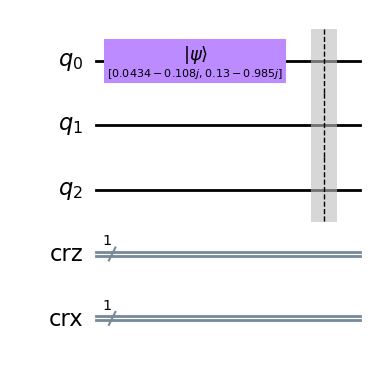

In [13]:
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
tc = QuantumCircuit(qr, crz, crx)
tc.initialize(psi.data, 0)
tc.barrier()
psi1 = Statevector(tc)
tc.draw("mpl")

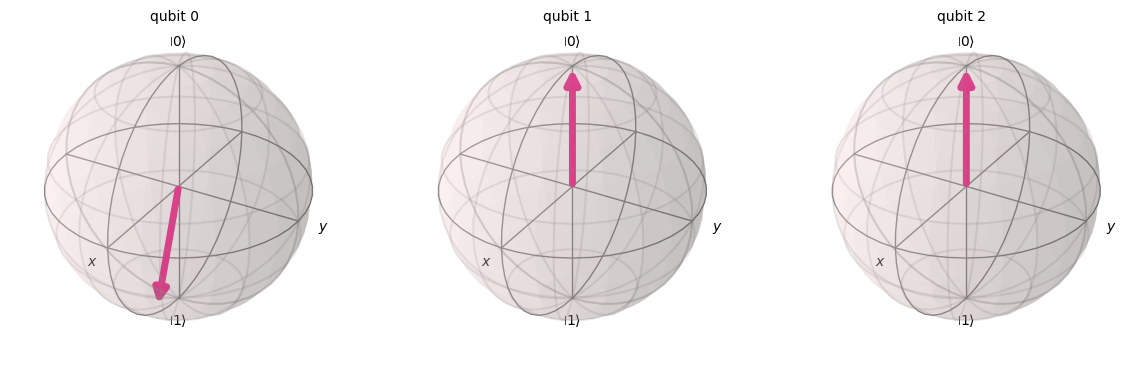

In [14]:
plot_bloch_multivector(psi1)

<p>Now, a Bell Pair is needed, lets entangle $q1$ and $q2$:</p>

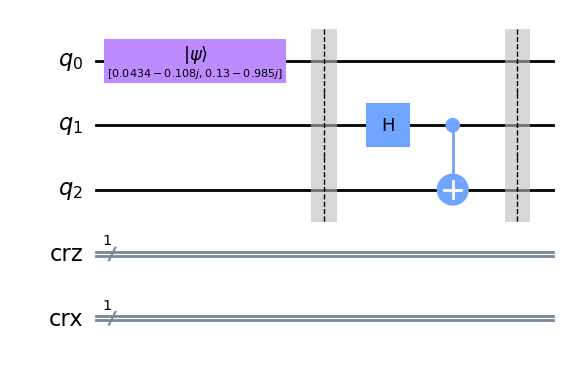

In [15]:
tc.h(1)
tc.cx(1, 2)
tc.barrier()
tc.draw("mpl")

<p>Now, A applies CNOT from $q0$ to $q1$ and hadamart at $q0$</p>

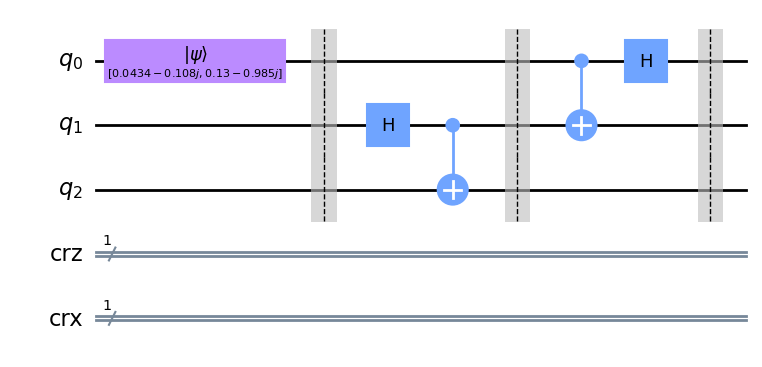

In [16]:
tc.cx(0,1)
tc.h(0)
psi2 = Statevector(tc)
tc.barrier()
tc.draw("mpl")

<p>Now, measurements are applied on the qubits owned by A and $q2$ is now sent to B</p>

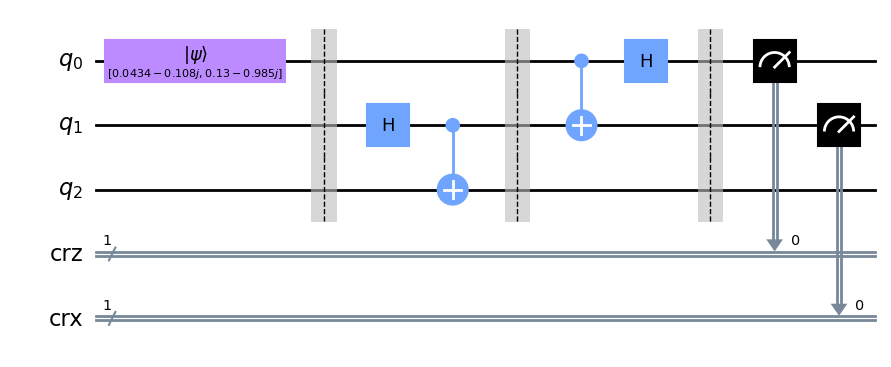

In [17]:
tc.measure(0,0)
tc.measure(1,1)
tc.draw("mpl")

<p>Now, on the B side, it needs to apply some gates depending on the states measured by A because it can be flipped or phased. </p>

| A measurement | B correction  |
|---------------|---------------|
|       00      |   nothing     |
|       01      | apply $X$ gate|
|       10      | apply $Z$ gate|
|       11      |apply $ZX$ gate|

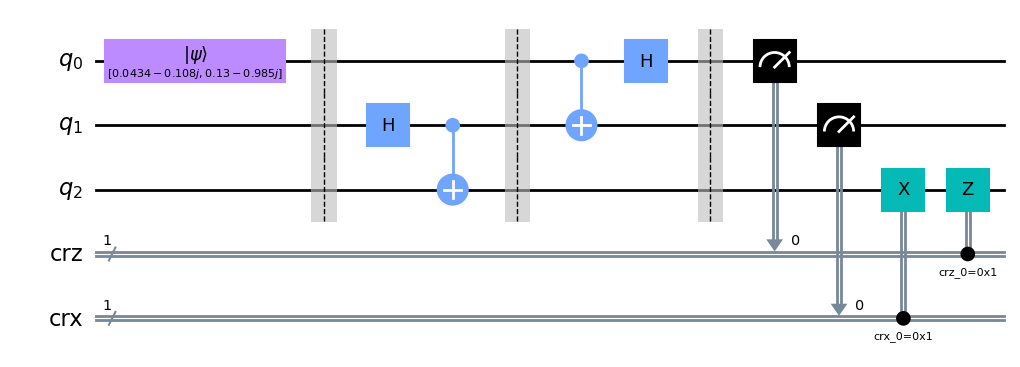

In [18]:
tc.x(2).c_if(1,1)
tc.z(2).c_if(0,1)
tc.draw("mpl")

Now, simulating the circuit, we can see that the original state at $q0$ is now on $q2$

In [19]:
simulator = StatevectorSimulator()
tc = transpile(tc, simulator)
result = execute(tc, simulator).result()
state_vector = result.get_statevector()


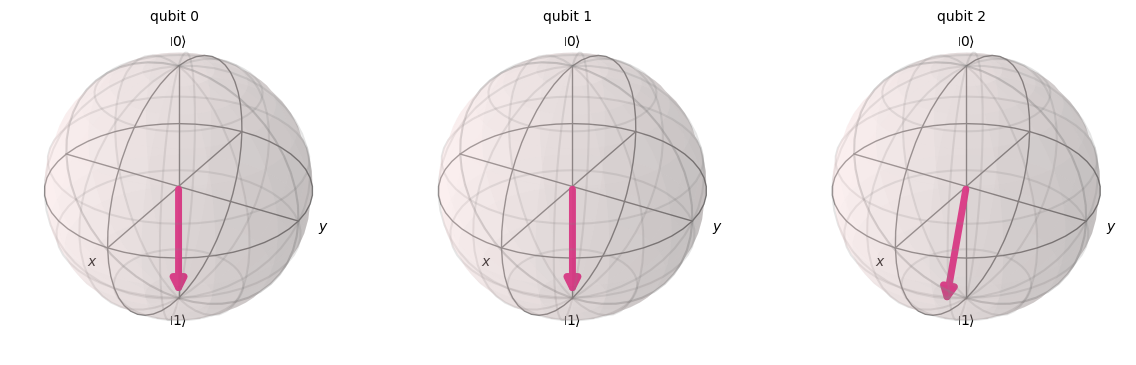

In [20]:
plot_bloch_multivector(state_vector)